# **(b)**

一樣先引入該用的套件及資料並切分訓練集與驗證集。sigmoid_basisfunc可將資料代入sigmoid基底函數，Weight來計算權重，RMS則用來計算最後的root mean square。並用上題決定好的feature來降低模型的複雜度，減少over-fitting。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [3]:
x = pd.read_csv('data_X.csv').drop('Serial_id',axis=1)
y = pd.read_csv('data_T.csv').drop('Serial_id',axis=1)
x = (x-x.mean())/(x.std())
x = pd.concat([x,y],axis=1)
x = x.reindex(np.random.permutation(x.index))

In [27]:
y = y.reindex(x.index)
x_training = x.iloc[:400,:-1]
x_valid = x.iloc[400:,:-1]
y_training = pd.DataFrame(x.iloc[:400,-1])
y_valid = pd.DataFrame(x.iloc[400:,-1])

In [28]:
x_new_train = x.iloc[:400,[0,1,4,5,6]]
x_new_valid = x.iloc[400:,[0,1,4,5,6]]
x_new_train

,GRE_score,TOFEL_score,LOR,CGPA,Research
332,-0.750057,-0.195992,-1.063267,-0.605873,0.885518
26,0.489414,0.297277,0.017289,0.369635,-1.127023
141,1.374750,1.777086,0.017289,1.295541,0.885518
214,1.286216,1.612663,1.638123,1.394746,0.885518
20,-0.395922,-0.031569,-1.603545,-1.118429,0.885518
...,...,...,...,...,...
426,-0.395922,-0.195992,1.638123,-0.010648,-1.127023
237,1.109149,1.119393,1.638123,1.014463,0.885518
127,0.223813,0.790547,-1.603545,0.220829,0.885518
319,0.932082,0.954970,-0.522989,0.187761,0.885518


In [5]:
def sigmoid_basisfunc(data):
    new_data = pd.DataFrame()
    for i in range(data.shape[1]):
        temp = pd.DataFrame(data.iloc[:,i]).applymap(lambda x:1/(1+np.exp(-x))) #輸入的data要先做好標準化才行
        new_data = pd.concat([new_data,temp],axis = 1) 
    return new_data #回傳已經代入sigmoid bisis的input

In [6]:
def Weight(x,y,Lambda=0):
    x = pd.concat([pd.Series(1,index=x.index,name = 'w0'),x],axis=1) #將輸入資料補上bias項
    x = x.to_numpy() #轉換成矩陣來運算
    temp = np.linalg.inv(np.eye(x.shape[1])*Lambda+np.dot(x.T,x))
    w = np.dot(np.dot(temp,x.T),y)
    return w

In [7]:
def RMS(x,y_training,w):
    x = pd.concat([pd.Series(1,index=x.index,name = 'w0'),x],axis=1) #將輸入資料補上bias項
    x = x.to_numpy() #轉換成矩陣來運算
    k = np.dot(x,w)
    p = k-y_training
    err = (p**2).iloc[:,0].sum()/(2*len(k))
    j = (err*2)**0.5
    return j

In [30]:
sigmoid_train = sigmoid_basisfunc(x_training)
sigmoid_valid = sigmoid_basisfunc(x_valid)
w_sigmoid = Weight(sigmoid_train,y_training)
print("Sigmoid basis all features\nTraining RMS = {}\nValid RMS = {}".format(RMS(sigmoid_train,y_training,w_sigmoid),RMS(sigmoid_valid,y_valid,w_sigmoid)))

Sigmoid basis all features
Training RMS = 0.058375327550373876
Valid RMS = 0.06974456742184741


In [34]:
sigmoid_new_train = sigmoid_basisfunc(x_new_train)
sigmoid_new_valid = sigmoid_basisfunc(x_new_valid)
w_new_sigmoid = Weight(sigmoid_new_train,y_training)
print("Sigmoid basis 5 features \nTraining RMS = {}\nValid RMS = {}".format(RMS(sigmoid_new_train,y_training,w_new_sigmoid),RMS(sigmoid_new_valid,y_valid,w_new_sigmoid)))

Sigmoid basis 5 features 
Training RMS = 0.05849752556523983
Valid RMS = 0.07014837750511017


# **(c)**

使用N_fold_rms函式來計算N-fold cross-validation的結果。我使用的是N=5來驗證，x_all為全部500筆全部特徵的input資料，而x_new_500則為特徵抽取過後的資料。

In [17]:
x_500 = x.iloc[:,[0,1,4,5,6]]
x_500

,GRE_score,TOFEL_score,LOR,CGPA,Research
332,-0.750057,-0.195992,-1.063267,-0.605873,0.885518
26,0.489414,0.297277,0.017289,0.369635,-1.127023
141,1.374750,1.777086,0.017289,1.295541,0.885518
214,1.286216,1.612663,1.638123,1.394746,0.885518
20,-0.395922,-0.031569,-1.603545,-1.118429,0.885518
...,...,...,...,...,...
2,-0.041788,-0.524839,0.017289,-0.953088,0.885518
247,-0.484456,-0.524839,0.017289,-0.159454,-1.127023
477,-0.661523,-0.360416,-1.603545,-0.655476,-1.127023
441,1.374750,0.790547,-0.522989,0.138158,0.885518


In [22]:
x_all = sigmoid_basisfunc(x.iloc[:,:-1])
x_all

,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research
332,0.320809,0.451158,0.475097,0.531743,0.256686,0.353001,0.707964
26,0.619968,0.573777,0.838797,0.756985,0.504322,0.591371,0.244711
141,0.798146,0.855337,0.274046,0.756985,0.504322,0.785084,0.707964
214,0.783506,0.833781,0.684560,0.756985,0.837279,0.801349,0.707964
20,0.402292,0.492108,0.475097,0.406755,0.167487,0.246303,0.707964
...,...,...,...,...,...,...,...
2,0.489555,0.371721,0.475097,0.406755,0.504322,0.278264,0.707964
247,0.381201,0.371721,0.274046,0.292777,0.504322,0.460221,0.244711
477,0.340398,0.410859,0.684560,0.531743,0.167487,0.341757,0.244711
441,0.798146,0.687949,0.136027,0.131129,0.372154,0.534485,0.707964


In [13]:
y_500 = x.iloc[:,-1]
y_500 = pd.DataFrame(y_500)
y_500

,Chance_of_Admit
332,0.75
26,0.76
141,0.90
214,0.94
20,0.64
...,...
2,0.72
247,0.71
477,0.65
441,0.79


In [10]:
x_new_500 = sigmoid_basisfunc(x_500)
x_new_500

,GRE_score,TOFEL_score,LOR,CGPA,Research
332,0.320809,0.451158,0.256686,0.353001,0.707964
26,0.619968,0.573777,0.504322,0.591371,0.244711
141,0.798146,0.855337,0.504322,0.785084,0.707964
214,0.783506,0.833781,0.837279,0.801349,0.707964
20,0.402292,0.492108,0.167487,0.246303,0.707964
...,...,...,...,...,...
2,0.489555,0.371721,0.504322,0.278264,0.707964
247,0.381201,0.371721,0.504322,0.460221,0.244711
477,0.340398,0.410859,0.167487,0.341757,0.244711
441,0.798146,0.687949,0.372154,0.534485,0.707964


In [14]:
def N_fold_rms(data,target,N):
    RMS_list_train = []
    RMS_list_valid = []
    seg = int(len(data)/N) 
    for i in range(N): 
        if i == N-1: #避免資料數無法剛好整除N
            xvalid = data.iloc[i*seg:,:]
            xtrain = data.drop(index = xvalid.index)
            yvalid = target.iloc[i*seg:,:]
            ytrain = target.drop(index = yvalid.index)
        else:
            xvalid = data.iloc[i*seg:i*seg+seg,:]
            xtrain = data.drop(index = xvalid.index)
            yvalid = target.iloc[i*seg:i*seg+seg,:]
            ytrain = target.drop(index = yvalid.index)
        w_train = Weight(xtrain,ytrain)
        res_train = RMS(xtrain,ytrain,w_train)
        res_valid = RMS(xvalid,yvalid,w_train)
        RMS_list_train.append(res_train)
        RMS_list_valid.append(res_valid)
    return RMS_list_train,RMS_list_valid

In [23]:
train_rms,valid_rms = N_fold_rms(x_all,y_500,5)
print("利用全部features的5-fold RMS\ntrain\n{}\n\n平均為:{}\n".format(train_rms,statistics.mean(train_rms)))
print("valid\n{}\n\n平均為:{}".format(valid_rms,statistics.mean(valid_rms)))

利用全部features的5-fold RMS
train
[0.060263982291069995, 0.06232601023775566, 0.060409320080980815, 0.060138905706298804, 0.058375327550373876]

平均為:0.06030270917329583

valid
[0.0621191884198519, 0.053862428194866904, 0.06207149803946537, 0.06292965593380032, 0.06974456742184741]

平均為:0.06214546760196638


In [24]:
train_5features,valid_5fetures = N_fold_rms(x_new_500,y_500,5)
print("只利用5個features的5-fold RMS\ntrain\n{}\n\n平均為:{}\n".format(train_5features,statistics.mean(train_5features)))
print("valid\n{}\n\n平均為:{}".format(valid_5fetures,statistics.mean(valid_5fetures)))

只利用5個features的5-fold RMS
train
[0.060587894937939146, 0.06247060213113423, 0.060932445547208405, 0.060337391765977494, 0.05849752556523983]

平均為:0.06056517198949982

valid
[0.0617394332201356, 0.05440654328546694, 0.060697316637533846, 0.06323506766891095, 0.07014837750511017]

平均為:0.062045347663431505


Text(0, 0.5, 'RMS')

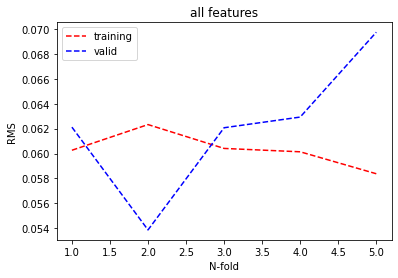

In [25]:
plt.figure()
plt.plot([1,2,3,4,5],train_rms,'r--',label = 'training')
plt.plot([1,2,3,4,5],valid_rms,'b--',label = 'valid')
plt.title('all features')
plt.legend(loc='best')
plt.xlabel('N-fold')
plt.ylabel('RMS')

Text(0, 0.5, 'RMS')

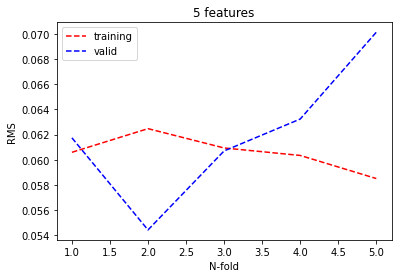

In [26]:
plt.figure()
plt.plot([1,2,3,4,5],train_5features,'r--',label = 'training')
plt.plot([1,2,3,4,5],valid_5fetures,'b--',label = 'valid')
plt.title('5 features')
plt.legend(loc='best')
plt.xlabel('N-fold')
plt.ylabel('RMS')